# COMP5318 - Machine Learning and Data Mining 

## Tutorial 3 - Probability

**Semester 2, 2020**

**Objectives:**

* To understand continuous and discrete random variables.
* To become familiar with random samples.
* To become familiar with metrics in Information Theory.


**Instructions:**
* Exercises to be completed on IPython notebook such as: 
   * Ipython 3 (Jupyter) notebook installed on your computer http://jupyter.org/install (you need to have Python installed first https://docs.python.org/3/using/index.html )
   * Web-based Ipython notebooks such as Google Colaboratory https://colab.research.google.com/ 
   
* If you are using Jupyter intalled on your computer, Go to File->Open. Drag and drop "lab3.ipynb" file to the home interface and click upload. 
* If you are using Google Colaboratory, Click File->Upload notebook, and and upload "lab3.ipynb" file
* Complete exercises in "lab3.ipynb".
* To run the cell you can press Ctrl-Enter or hit the Play button at the top.
* Complete all exercises marked with **TODO**.
* Save your file when you are done with the exercises, so you can show your tutor next week.

Lecturers: Nguyen Hoang Tran 

Tutors: Canh Dinh, Chen Chen, Claire Hardgrove, Fengxiang He, Henry Weld, Yixuan Zhang, Zhiyi Wang, Thomas Selvaraj.

# 1 Probability Distributions

## 1.1 Continuous random variables

Some of the methods in scipy.stats library for random variables include,
* rvs: Random Variates
* pdf/pmf: Probability Density/Mass Function
* cdf: Cumulative Distribution Function
* stats: Return mean, variance, (Fisher’s) skew, or (Fisher’s) kurtosis
* moment: non-central moments of the distribution

In [1]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

from scipy import stats as st

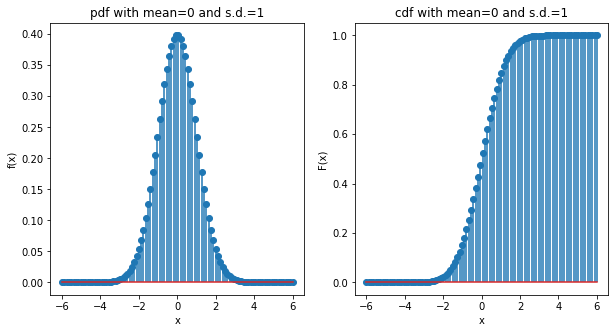

In [2]:
mean, sd = 0, 1
x = np.linspace(mean - 6*sd, mean + 6*sd, 100)
f = st.norm.pdf(x=x, loc=mean, scale=sd)
F = st.norm.cdf(x=x, loc=mean, scale=sd)

pl.figure(figsize=(10,5))
pl.subplot(121)
pl.stem(x, f); pl.xlabel('x'); pl.ylabel('f(x)'); pl.title('pdf with mean={} and s.d.={}'.format(mean, sd))
pl.subplot(122)
pl.stem(x, F); pl.xlabel('x'); pl.ylabel('F(x)'); pl.title('cdf with mean={} and s.d.={}'.format(mean, sd))
pl.show()

**Exercise 1.1.1** Change location and scale parameters (e.g. loc=1, scale=0.25) and observe results.

## 1.2 Discrete random variables

**Exercise 1.2.1** In an urn which contains M=100 different currency bills, n=25 bills are Australian dollars. Plot the pmf and cdf if N=15 bills are randomly drawn *without replacement*.

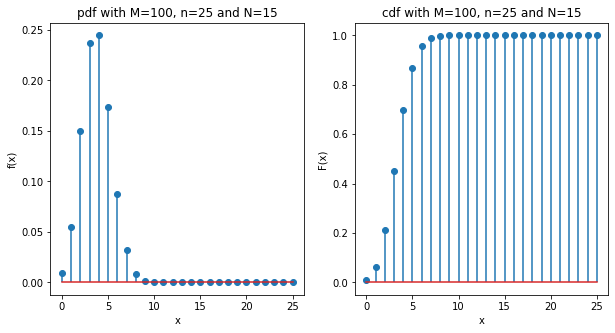

In [3]:
#Answer
M, n, N = 100, 25, 15 #Population, Successes, No of draws
x = np.arange(0, n+1)
f = st.hypergeom.pmf(x, M, n, N)
F = st.hypergeom.cdf(x, M, n, N)

pl.figure(figsize=(10,5))
pl.subplot(121)
pl.stem(x, f); pl.xlabel('x'); pl.ylabel('f(x)'); pl.title('pdf with M={}, n={} and N={}'.format(M, n, N))
pl.subplot(122)
pl.stem(x, F); pl.xlabel('x'); pl.ylabel('F(x)'); pl.title('cdf with M={}, n={} and N={}'.format(M, n, N))
pl.show()

#2. Sampling

## 2.1 Pseudo-random number generators (PRNG)

**Exercise 2.1.1** Discuss how random numbers are generated in a computer (Turing machine). 

## 2.2 Sampling from a distribution

Normal distribution

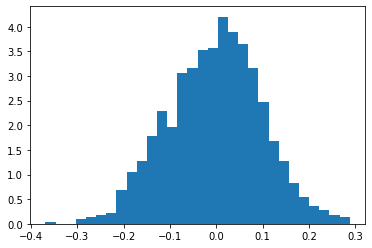

In [4]:
mu, sigma = 0, 0.1 # mean and standard deviation
samples = np.random.normal(mu, sigma, 1000) # or use scipy.stats.rvs(size=1000)

count, bins, ignored = pl.hist(samples, bins=30, density=True)
pl.show()

Multivaraiate normal

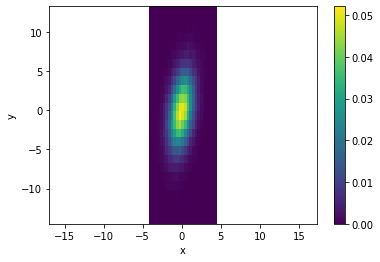

In [5]:
mean = (0, 0)
cov = [[1, 1], [1, 10]]
x, y = np.random.multivariate_normal(mean, cov, 100000).T

#pl.scatter(x, y)
pl.hist2d(x, y, 25, density=True) #hexbin
pl.xlabel('x'); pl.ylabel('y')
pl.colorbar()
pl.axis('equal')
pl.show()
del x, y

**Exercise 2.2.1** Observe the probability distribution by varying mean and covariance.

# 3. Information Theory

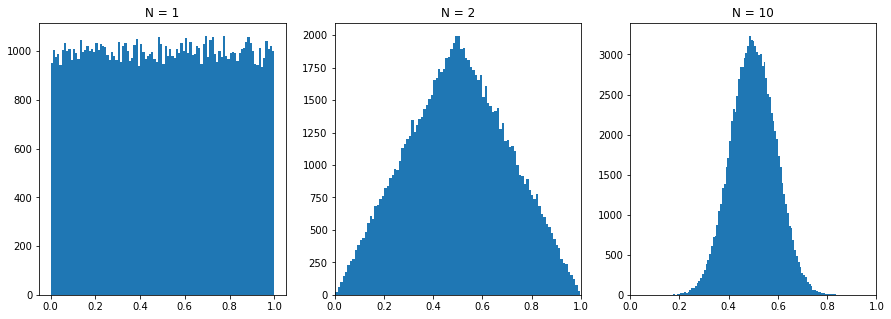

In [8]:
N = 10
x = np.random.random((N, 100000)) #np.random.beta(10, 0.5,(N, 1E5)) change N to 100

pl.figure(figsize=(15,5))

Na = 1
pl.subplot(131)
pl.hist(x[:Na, :].mean(0), 100) #let the bin size be 100
#pl.axis([0, 1, 0, None])
pl.title('N = {}'.format(Na))

pl.subplot(132)
Nb = 2
pl.hist(x[:Nb, :].mean(0), 100)
pl.axis([0, 1, 0, None])
pl.title('N = {}'.format(Nb))

pl.subplot(133)
Nc = N
pl.hist(x[:Nc, :].mean(0), 100)
pl.axis([0, 1, 0, None])
pl.title('N = {}'.format(Nc))

pl.show()
del x

## 3.1 Entropy 

Entropy is a measure of uncertainty.
\begin{equation}
    \mathrm{H}[x] := \sum_x p(x)log_n \frac{1}{p(x)} = -\sum_x p(x)log_n \big( p(x) \big)
\end{equation}

If n=2, the unit of measurement is in bits.

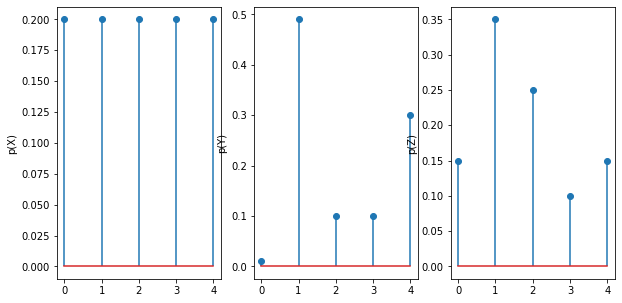

2.321928094887362 1.7561955684982449 2.1833830982290134


In [9]:
#Observe how Entropy changes with the spread of data 
X = np.arange(5)
Z = Y = X 

pX = np.array([ 0.2, 0.2, 0.2, 0.2, 0.2])
pY = np.array([ 0.01, 0.49, 0.1, 0.10, 0.30])
pZ = np.array([ 0.15, 0.35, 0.25, 0.1, 0.15])

pl.figure(figsize=(10,5))
pl.subplot(131)
pl.stem(X, pX) 
pl.ylabel('p(X)')

pl.subplot(132)
pl.stem(Y, pY)
pl.ylabel('p(Y)')

pl.subplot(133)
pl.stem(Z, pZ)
pl.ylabel('p(Z)')

pl.show()

def calc_entropy(p):
    return -np.sum(p*np.log2(p)) #from scipy import stats as st; st.entropy(pX, base=2)

print(calc_entropy(pX), calc_entropy(pY), calc_entropy(pZ))

**Exercise 3.1.1** Consider the Bernoulli trial of tossing a coin (unfair coin) with event space X. Let $p(X=1)$ be the probability of obtaining a head. Calculate the entopy for $p(X=1) \in [0,1]$ and show that entopy decreases as the uncertainty decreases.

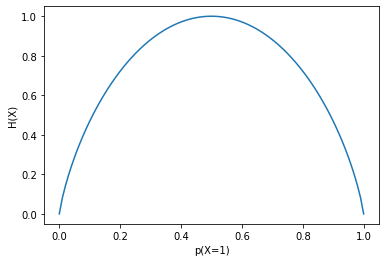

In [10]:
eps = np.finfo(float).eps
p = np.linspace(0+eps, 1-eps, 100)
H = np.empty(p.shape)
for i, theta in enumerate(p):
    H[i] = calc_entropy(np.array([theta, 1-theta]))

pl.plot(p, H)
pl.xlabel('p(X=1)'); pl.ylabel('H(X)')
pl.show()

## 3.2 Kullback-Leibler (KL) divergence or Relative Entropy

KL divergence measures how dissimilar two probability distributions are.
\begin{equation}
    \mathrm{KL}(p||q) := \sum_x p(x) log_n \frac{p(x)}{q(x)}
\end{equation}

In [11]:
def calc_KL(p, q):
    return np.sum(p*np.log2(p/q)) #from scipy import stats as st; st.entropy(p, q, base=2)

print('KL(p||p)', calc_KL(pX, pX)) #Note min(KL) is zero when iff p=q
print('KL(p||q)', calc_KL(pX, pY))
print('KL(q||p)', calc_KL(pY, pX)) # Note KL is not symmetric

KL(p||p) 0.0
KL(p||q) 0.888836768987672
KL(q||p) 0.5657325263891176


## 4. Bayes' Rule

\begin{equation}
    p(Y=y|X=x) = \frac{p(X=x|Y=y) p(Y=y)}{\sum_{y'} p(X=x|Y=y')p(Y=y')}
\end{equation}

**Exercise 4.1.1** 

0.4% of a population is having a particular genetic disorder. In order to test the disorder, a person has undergone a medical test which has a **sensitivity** of 80% (if a person has the disorder, the test result will be positive with a probability of 0.8) and a **false alarm** of 10%. If the test is positive, what is the probability of person the having the particular genetic disorder?

Answer


Let $x=1$ be positive test results and $x=0$ be negative test results.

Let $y=1$ be the person has a cancer and $y=0$ be the person does not have a cancer.

* prior: $p(Y=1) = 0.004$ and $p(Y=0) = 1-0.004 = 0.996$

* sensitivity: $p(X=1|Y=1) = 0.8$

* false positive/alarm: $p(X=1|Y=0) = 0.1$

\begin{equation}
    p(Y=1|X=1) = \frac{p(X=1|Y=1) p(Y=1)}{p(X=1|Y=1)p(Y=1)+p(X=1|Y=0)p(Y=0)} 
    = \frac{0.8 \times 0.004}{0.8 \times 0.004 + 0.1 \times 0.996}
    = 0.0311 \approx 3\%
\end{equation}